# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio



Objetivo principal -> Compreender como a variável de renda deve ser utilizada na concessão de crédito aos cliente e de que forma a relação desta variável dependente em conjunto com as explicativas podem contribuir para definir o perfil "default" do cliente

Área de atuação -> Na conclusão de que nossa empresa atua no ramo financeiro, é imprecindivel para ela contar com bons modelos de análise de crédito, já que este é o alicerce para balizar todas as operações, o modelo será utilizado por equipes de crédito, risco e análise financeira, e deve atuar para minimizar os riscos de inadimplência, aprimorar a experiência do usuário oferecendo uma concessão de crédito mais dinâmica e maximizar a base de clientes elegiveis. 

## Etapa 2 Crisp-DM: Entendimento dos dados



### Dicionário de dados





| Variável                | Descrição                                                   | Tipo         |
| ----------------------- |:----------------------------------------------------------: | ------------:|
| data_ref                |  Data de registro das informações do cliente                |datetime64[ns]|
| id_cliente              |  Código de identificação para o registro de cada cliente    |int64         |
| sexo                    |  Sexo do cliente                                            |object        |
| posse_de_veiculo        |  Indicação da posse de veiculo do cliente                   | bool         |
| posse_de_imovel         |  Indicação da posse de imóvel do cliente                    | bool         |
| qtd_filhos              |  Quantidade de filhos que o cliente possui                  | int64        |
| tipo_renda              |  Tipo de renda do cliente                                   | object       |
| educacao                |  Nivel de educação acadêmica do cliente                     | object       |
| estado_civil            |  Status conjugal do cliente                                 | object       |
| tipo_residencia         |  Modelo de moradia do cliente                               | object       |
| idade                   |  Idade do cliente                                           | int64        |
| tempo_emprego           |  Tempo de trabalho continuo do cliente                      | object       |
| qt_pessoas_residencia   |  Quantidade de pessoas que dividem moradia com o cliente    | float64      |
| renda                   |  Número absoluto de ganho mensal do cliente                 | int64        |





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [280]:
# Bibliotecas padrão
import os

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Modelagem estatística
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Análise exploratória
from ydata_profiling import ProfileReport

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# Configuração de plots inline para Jupyter Notebook
%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [281]:
previsao_renda = pd.read_csv('./input/previsao_de_renda.csv')

#### Tratamento dos dados

In [282]:
df_completo = previsao_renda.drop(columns=(['Unnamed: 0', 'sexo']))
df_completo

,data_ref,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,16006,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,2016-03-01,3722,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,2016-03-01,6194,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,2016-03-01,4922,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [283]:
ids_duplicados = [id_ for id_, quantidade in df_completo['id_cliente'].value_counts().items() if quantidade > 1]
df_duplicados = df_completo[df_completo['id_cliente'].isin(ids_duplicados)]
df_duplicados.sort_values(by='id_cliente')

,data_ref,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
9064,2015-10-01,1,False,True,0,Empresário,Secundário,Solteiro,Casa,52,8.358904,1.0,1938.57
7077,2015-08-01,1,False,True,0,Empresário,Secundário,Solteiro,Casa,52,8.358904,1.0,1938.57
9212,2015-10-01,2,False,True,0,Empresário,Secundário,Solteiro,Casa,52,8.358904,1.0,5702.28
7377,2015-08-01,2,False,True,0,Empresário,Secundário,Solteiro,Casa,52,8.358904,1.0,5702.28
13907,2016-02-01,8,False,True,1,Assalariado,Secundário,Solteiro,Casa,30,4.438356,2.0,373.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6230,2015-07-01,16633,False,True,1,Empresário,Superior completo,Solteiro,Casa,28,2.465753,2.0,3771.21
10867,2015-11-01,16633,False,True,1,Empresário,Superior completo,Solteiro,Casa,28,2.465753,2.0,3771.21
12663,2016-01-01,16633,False,True,1,Empresário,Superior completo,Solteiro,Casa,28,2.465753,2.0,3771.21
10477,2015-11-01,16647,True,True,0,Assalariado,Secundário,Casado,Casa,30,9.800000,2.0,9068.91


In [284]:
df_completo = df_completo.drop_duplicates(subset='id_cliente', keep='first')

In [285]:
df_completo.loc[df_completo['id_cliente'] == 9948]

,data_ref,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
203,2015-01-01,9948,False,False,0,Empresário,Secundário,Casado,Casa,39,3.175342,2.0,728.96


In [286]:
df_completo.loc[df_completo['tempo_emprego'].isna(), 'tipo_renda'].value_counts(normalize=True)

tipo_renda
Pensionista    1.0
Name: proportion, dtype: float64

In [287]:
print(f'Mapeando quais variáveis possuem ausência de informação em suas linhas, encontramos:{[nome for nome, valor in df_completo.isna().any().items() if valor == True]} ')
print("""E todas as linhas com valores ausentes em tempo_emprego compartilham de uma mesma relação com a variável tipo_renda, esta sendo em todos os casos da categoria Pensionista.\nAssim encontramos "zeros estruturais" no conjunto de dados, pois a ausência de valores é justificada""")
print('---')
print("""Outro ponto observado, é a enorme quantidade de linhas com a variável "id_cliente" duplicada, repetindo todas as outras variáveis com excessão de alguns poucos casos, se tratando de 8.998 linhas com informações repetidas  de um total de 15.000 """)

Mapeando quais variáveis possuem ausência de informação em suas linhas, encontramos:['tempo_emprego'] 
E todas as linhas com valores ausentes em tempo_emprego compartilham de uma mesma relação com a variável tipo_renda, esta sendo em todos os casos da categoria Pensionista.
Assim encontramos "zeros estruturais" no conjunto de dados, pois a ausência de valores é justificada
---
Outro ponto observado, é a enorme quantidade de linhas com a variável "id_cliente" duplicada, repetindo todas as outras variáveis com excessão de alguns poucos casos, se tratando de 8.998 linhas com informações repetidas  de um total de 15.000 


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [288]:
df_vizualizacao = df_completo.copy()

In [289]:
df_vizualizacao.drop(columns=['data_ref', 'id_cliente'], inplace=True)

In [290]:
[(print(f'Nome da coluna: {nome}\nQuantidade de valores únicos: {col.nunique()}\n---')) for nome, col in df_vizualizacao.items()]

Nome da coluna: posse_de_veiculo
Quantidade de valores únicos: 2
---
Nome da coluna: posse_de_imovel
Quantidade de valores únicos: 2
---
Nome da coluna: qtd_filhos
Quantidade de valores únicos: 8
---
Nome da coluna: tipo_renda
Quantidade de valores únicos: 5
---
Nome da coluna: educacao
Quantidade de valores únicos: 5
---
Nome da coluna: estado_civil
Quantidade de valores únicos: 5
---
Nome da coluna: tipo_residencia
Quantidade de valores únicos: 6
---
Nome da coluna: idade
Quantidade de valores únicos: 47
---
Nome da coluna: tempo_emprego
Quantidade de valores únicos: 2589
---
Nome da coluna: qt_pessoas_residencia
Quantidade de valores únicos: 9
---
Nome da coluna: renda
Quantidade de valores únicos: 9786
---


[None, None, None, None, None, None, None, None, None, None, None]

In [291]:
# ['idade', 'tempo_emprego', 'renda']

In [292]:
df_vizualizacao[
    [
        "posse_de_veiculo",
        "posse_de_imovel",
        "qtd_filhos",
        "tipo_renda",
        "educacao",
        "estado_civil",
        "tipo_residencia",
        "qt_pessoas_residencia",
    ]
] = df_vizualizacao[
    [
        "posse_de_veiculo",
        "posse_de_imovel",
        "qtd_filhos",
        "tipo_renda",
        "educacao",
        "estado_civil",
        "tipo_residencia",
        "qt_pessoas_residencia",
    ]
].astype('category')

In [293]:
df_vizualizacao

,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...
14992,False,False,1,Assalariado,Superior completo,Casado,Casa,33,1.041096,3.0,1918.14
14996,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


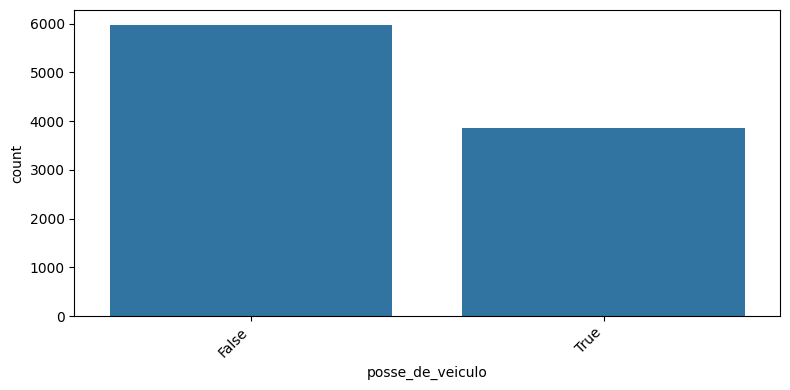

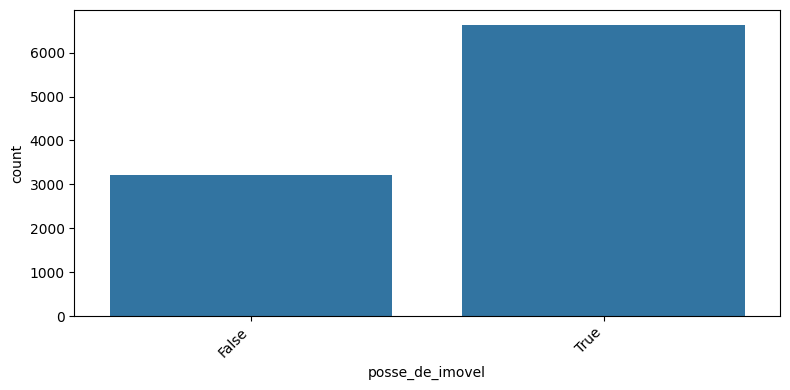

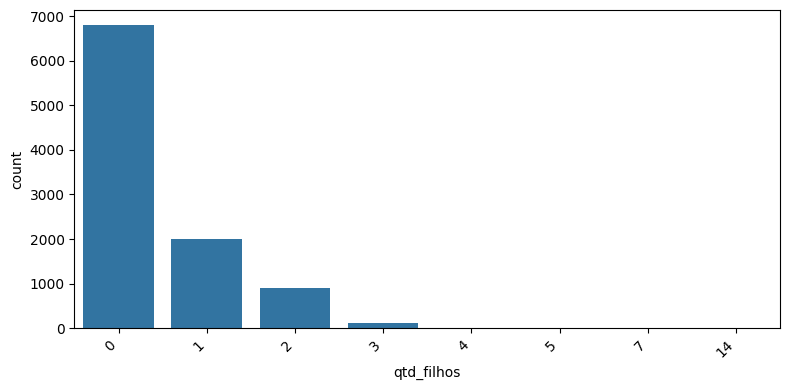

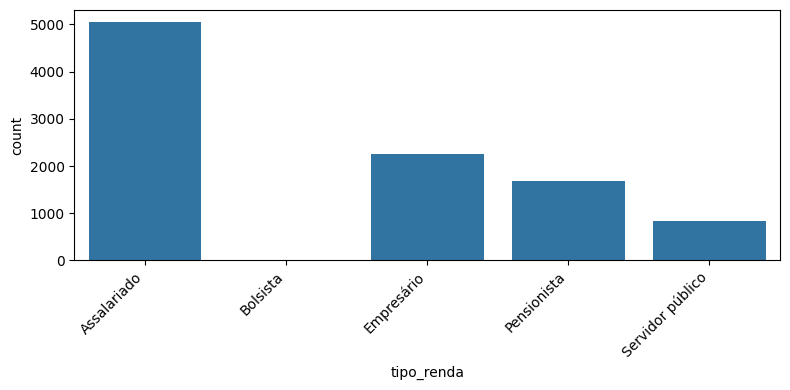

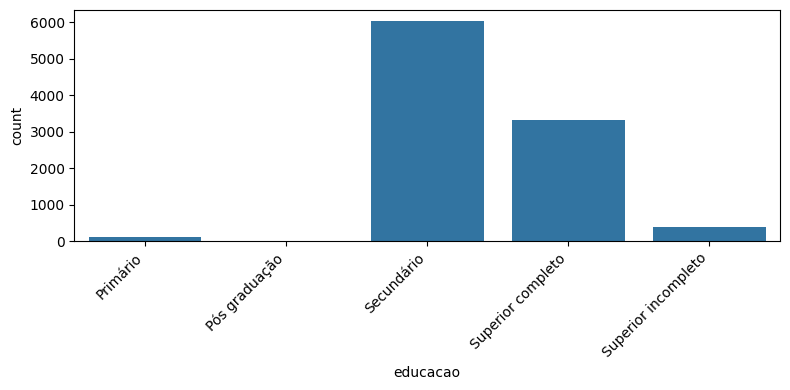

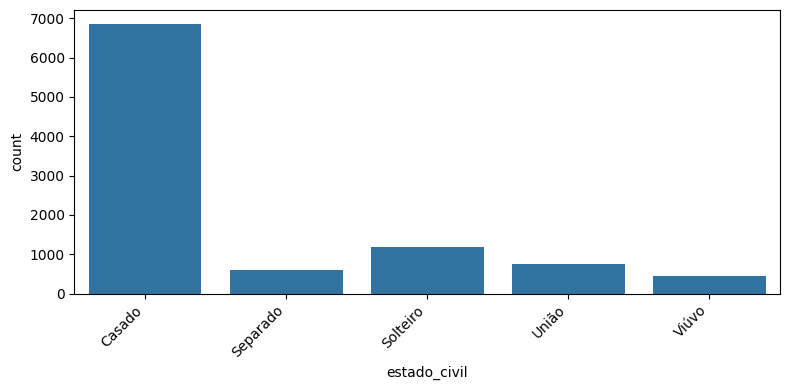

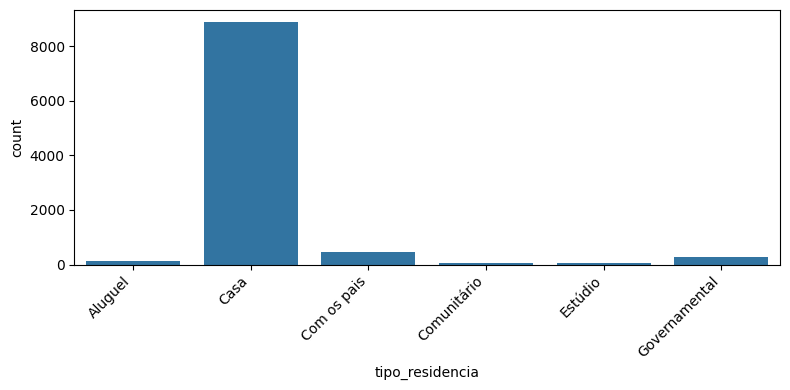

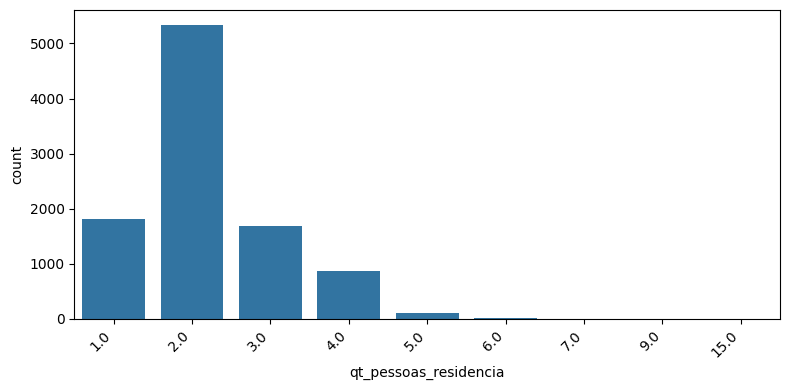

In [294]:
for col in df_vizualizacao.select_dtypes(['category']).columns.to_list():
    fig, ax = plt.subplots(figsize=(8,4))
    sns.countplot(data= df_vizualizacao, x=col)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    plt.show()

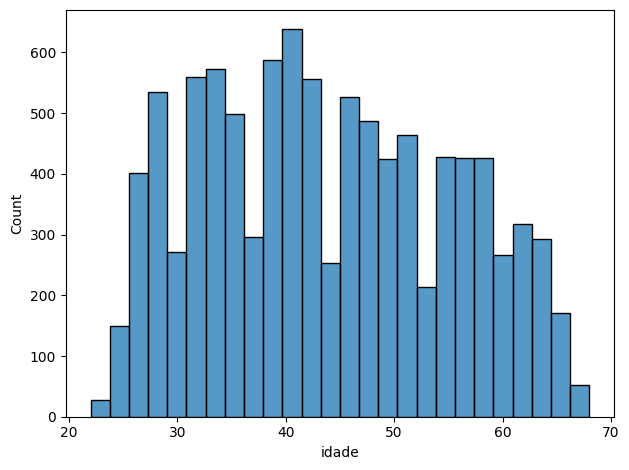

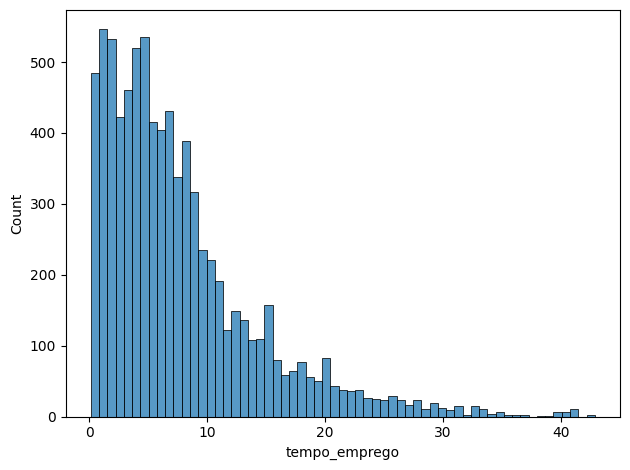

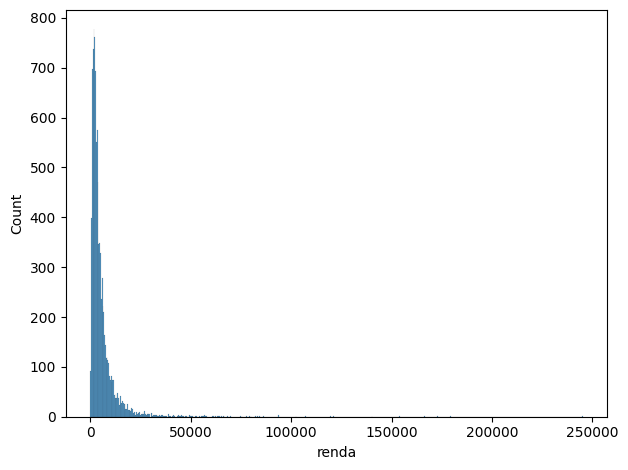

In [295]:
for col in df_vizualizacao[['idade', 'tempo_emprego', 'renda']].columns.to_list():
    sns.histplot(data= df_vizualizacao, x=col)
    plt.tight_layout()
    plt.show()

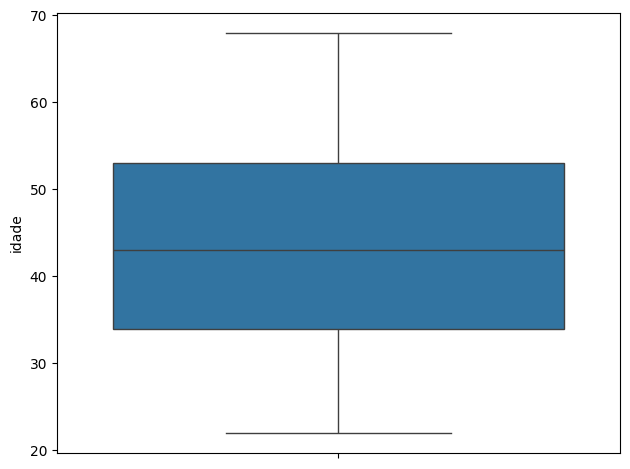

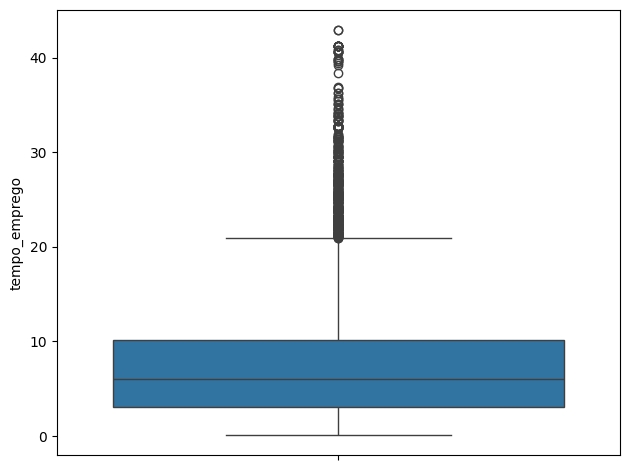

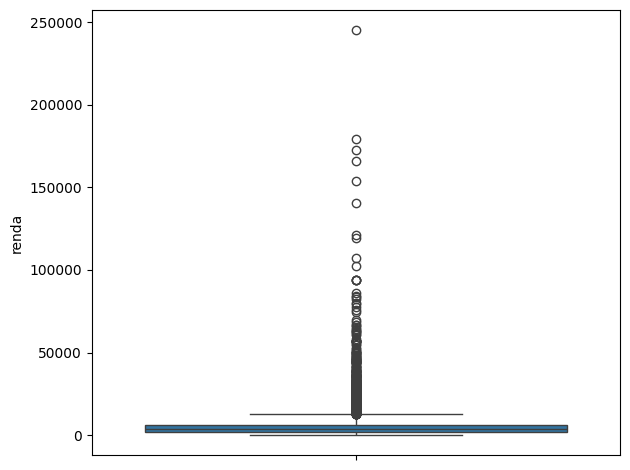

In [296]:
for col in df_vizualizacao[['idade', 'tempo_emprego', 'renda']].columns.to_list():
    sns.boxplot(data= df_vizualizacao, y=col)
    plt.tight_layout()
    plt.show()

### Entendimento dos dados - Bivariadas




A coluna de interesse abordada agora é: idade


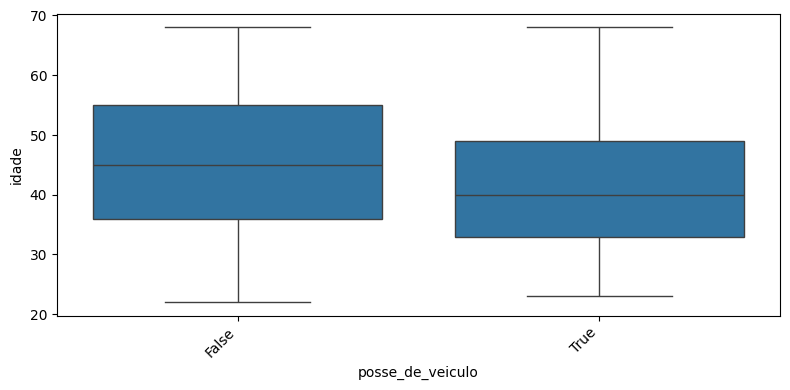

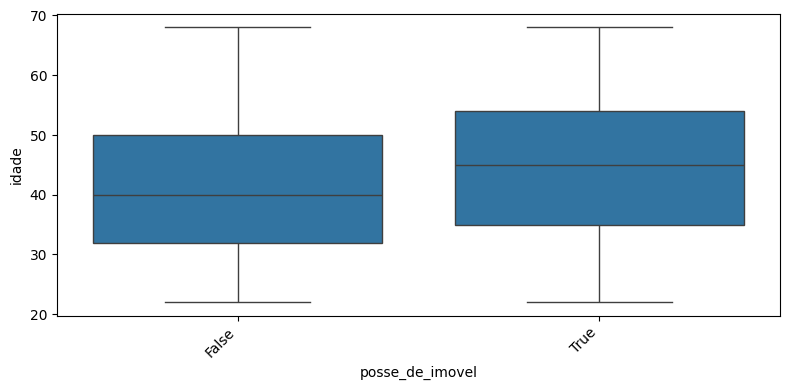

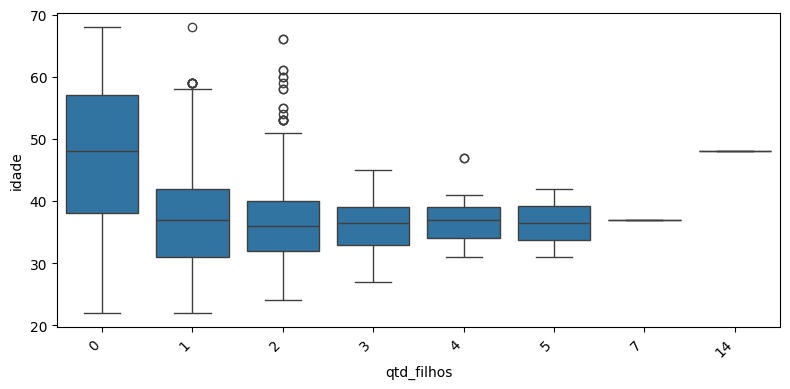

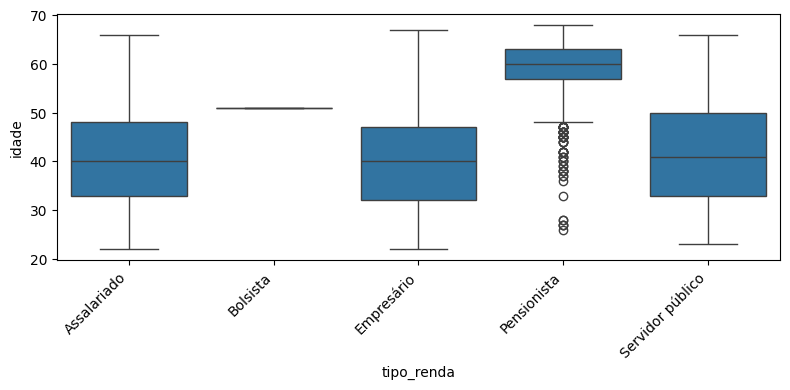

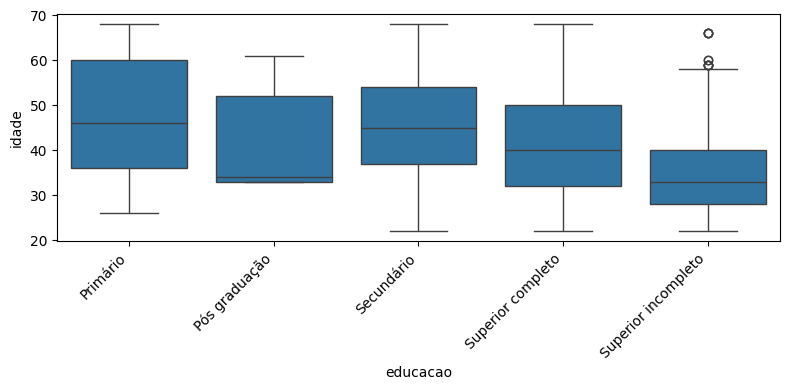

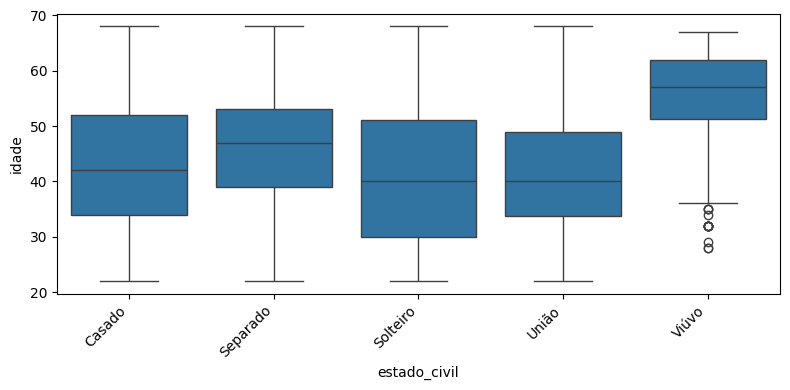

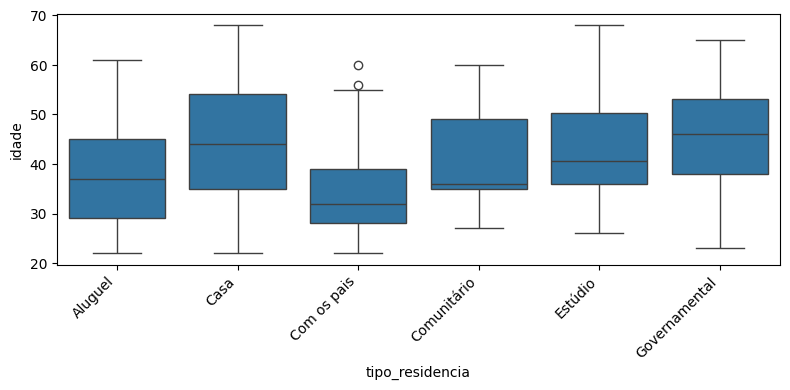

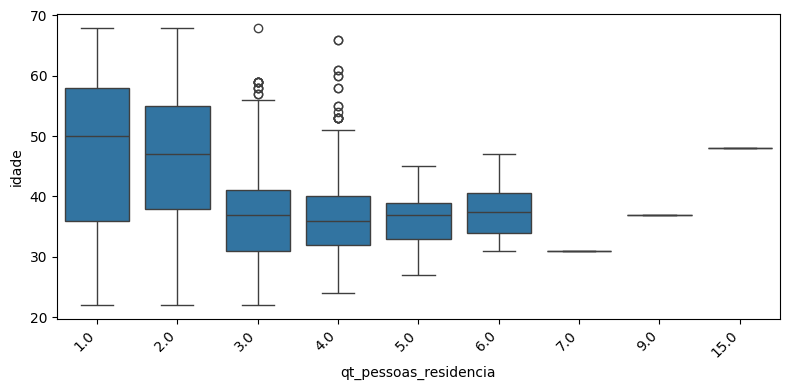

A coluna de interesse abordada agora é: tempo_emprego


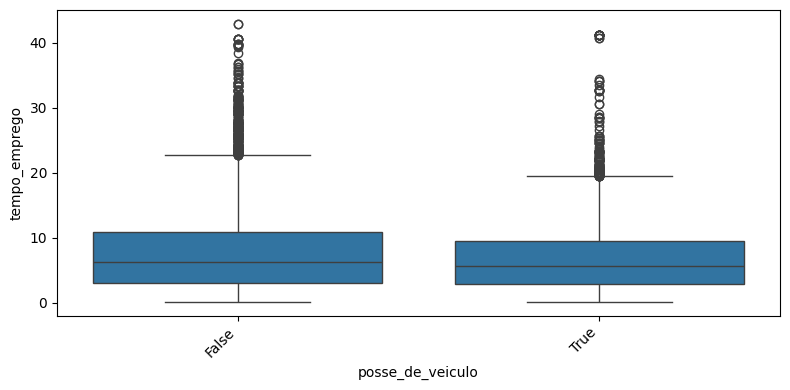

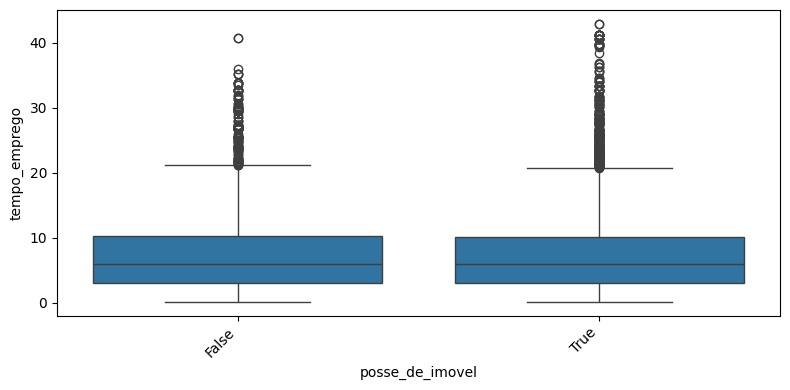

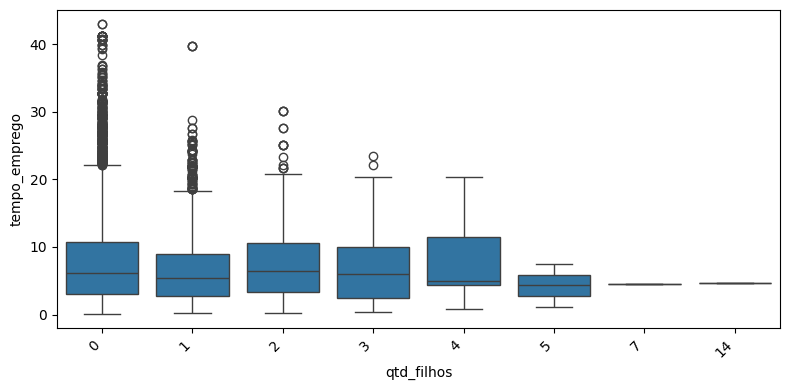

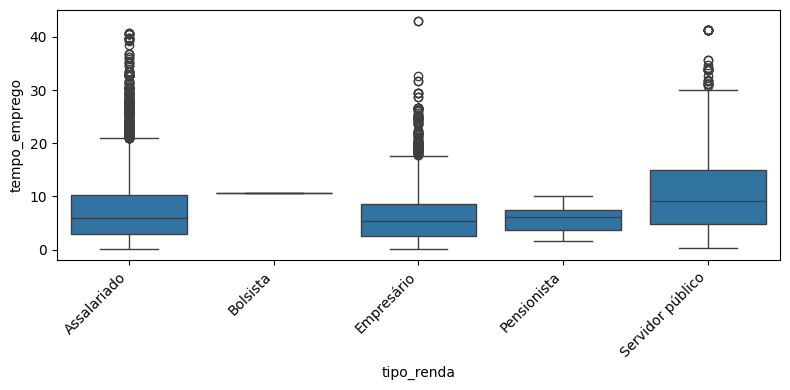

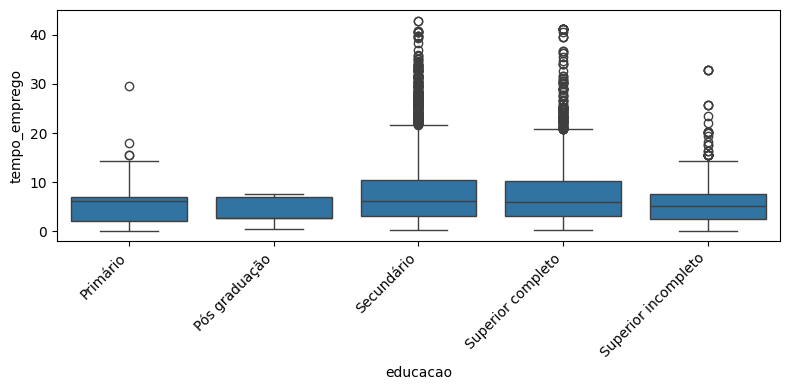

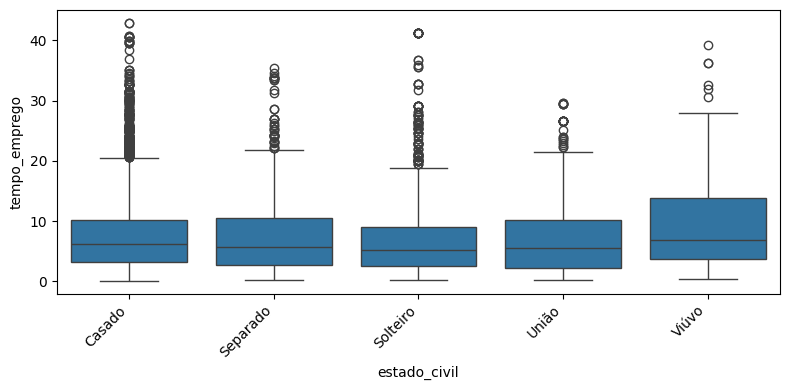

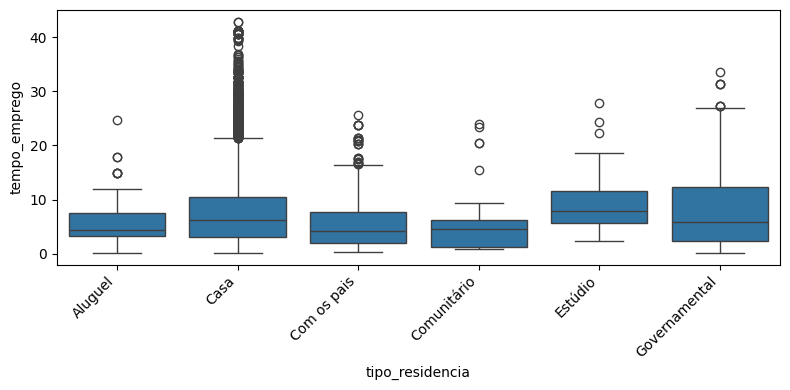

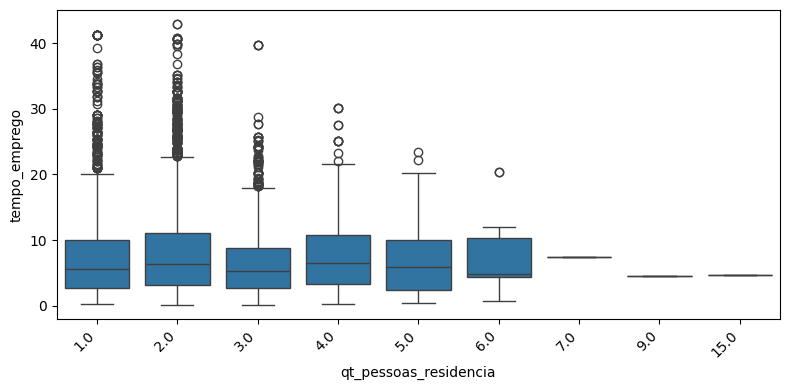

A coluna de interesse abordada agora é: renda


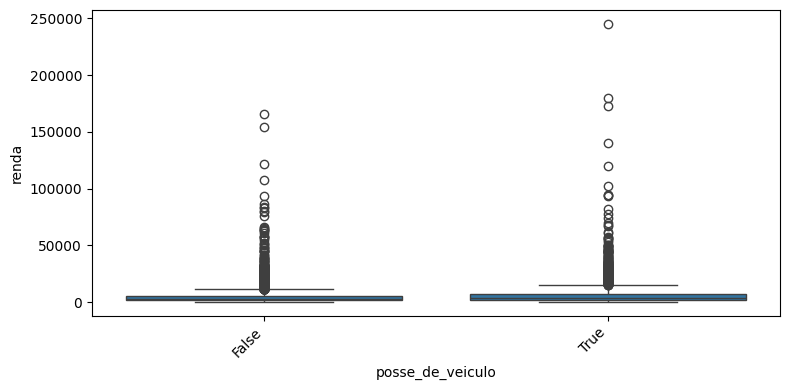

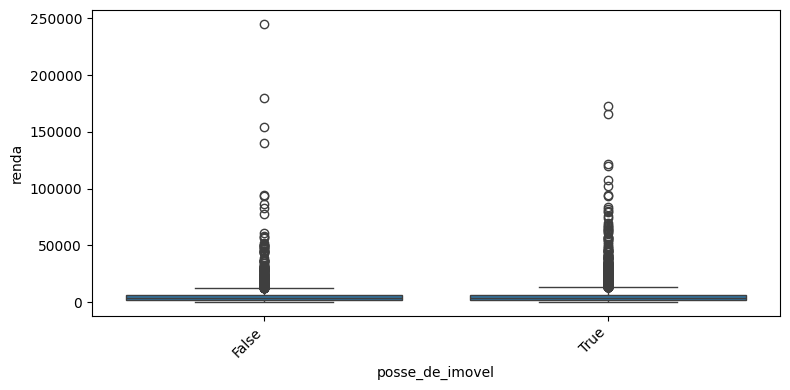

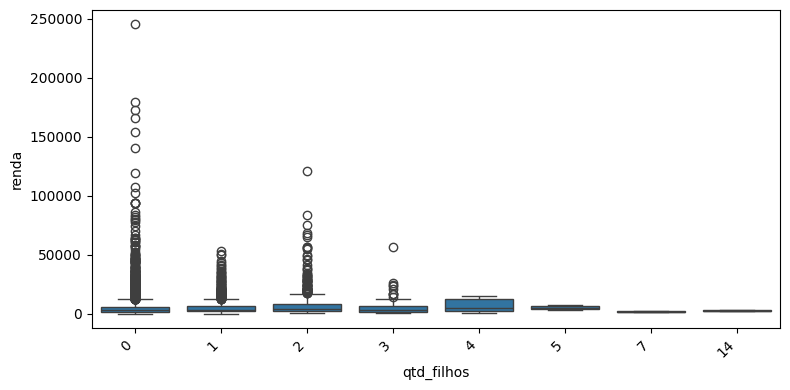

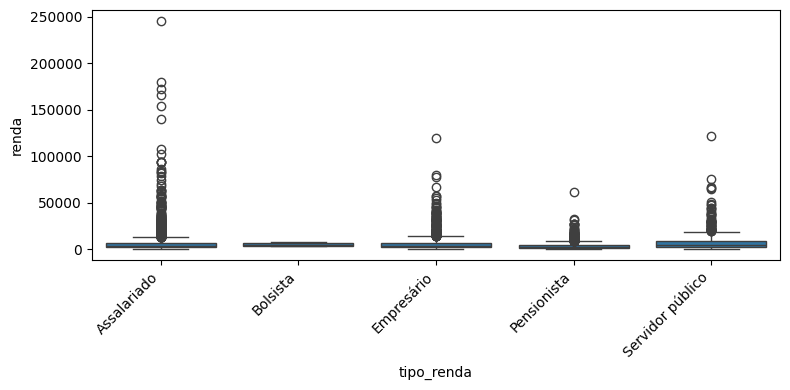

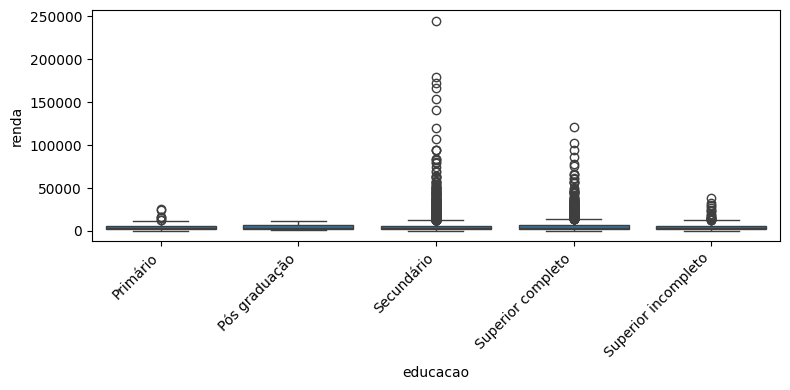

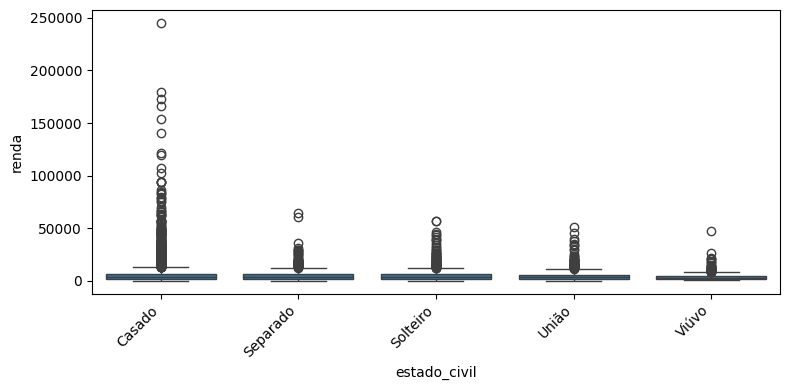

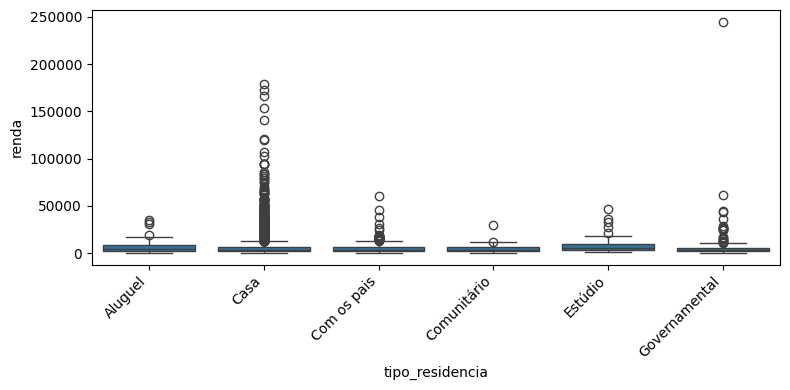

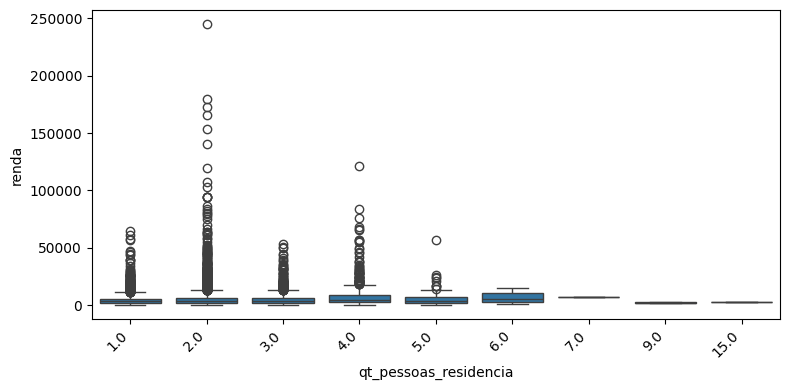

In [297]:
lista_variaveis_continuas = ['idade', 'tempo_emprego', 'renda']
lista_variaveis_categoricas = df_vizualizacao.select_dtypes(['category']).columns.to_list()

for col_interesse in lista_variaveis_continuas:
    print(f'A coluna de interesse abordada agora é: {col_interesse}')
    for col_categorica in lista_variaveis_categoricas:
        fig, ax = plt.subplots(figsize=(8,4))
        sns.boxplot(x=df_vizualizacao[col_categorica], y= df_vizualizacao[col_interesse])
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        

A coluna de interesse abordada agora é: idade


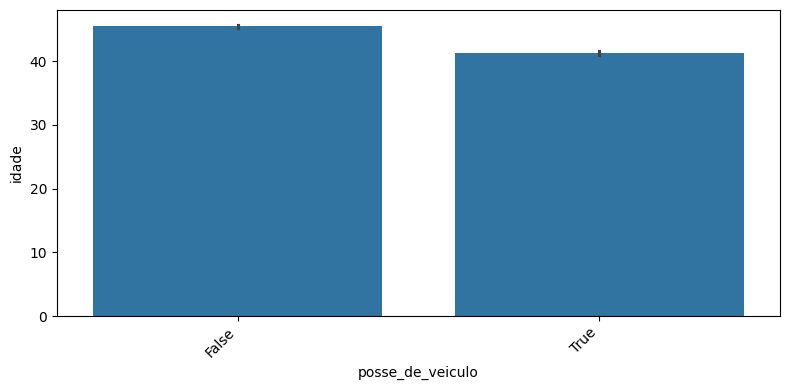

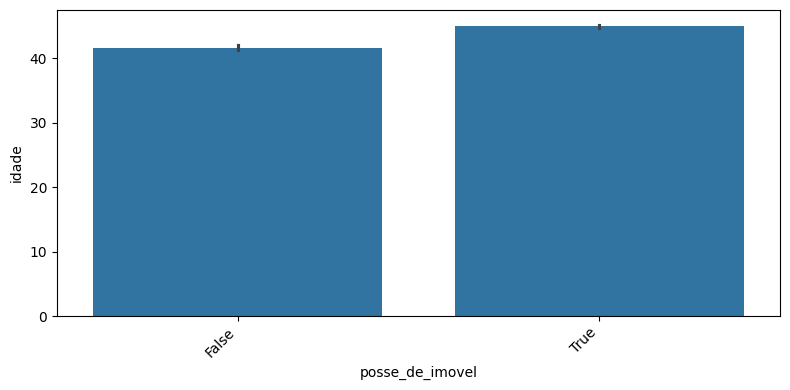

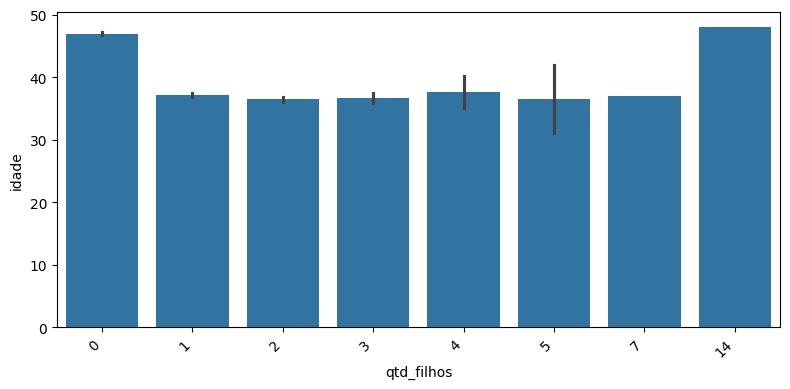

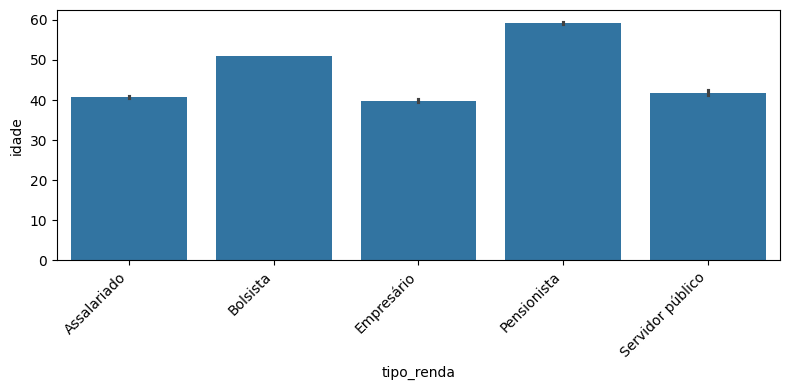

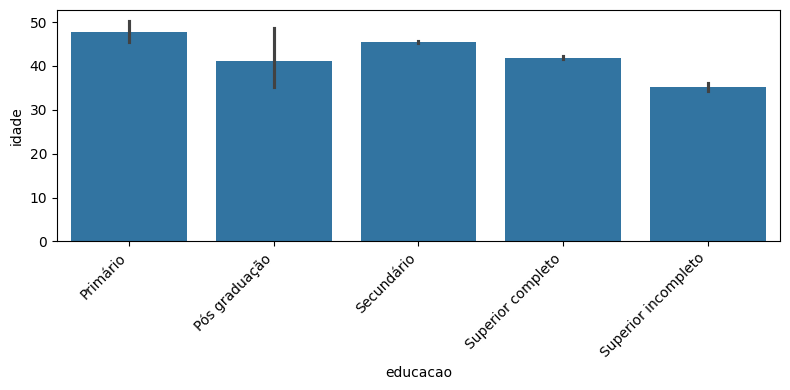

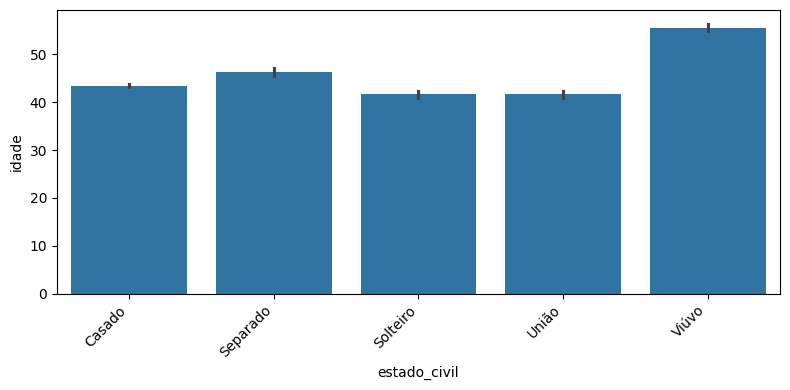

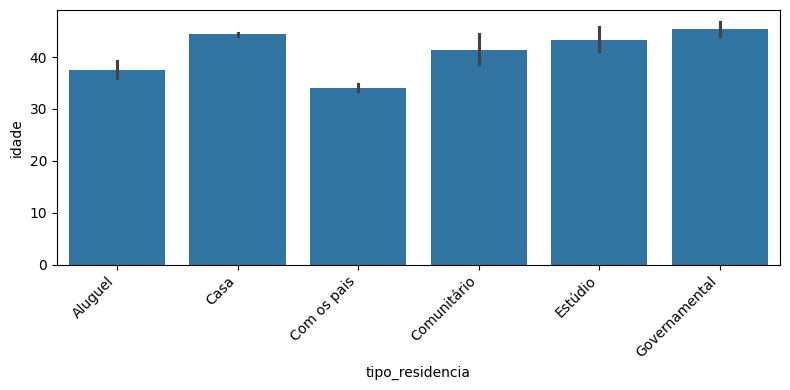

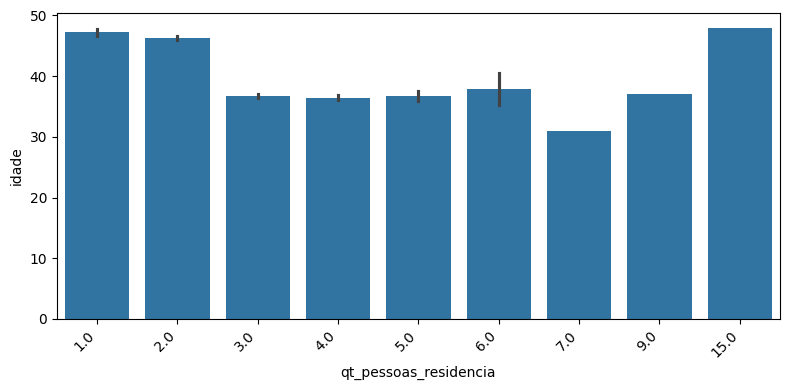

A coluna de interesse abordada agora é: tempo_emprego


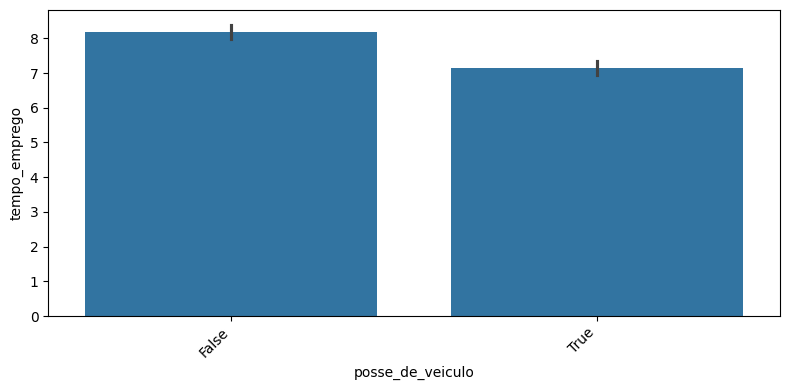

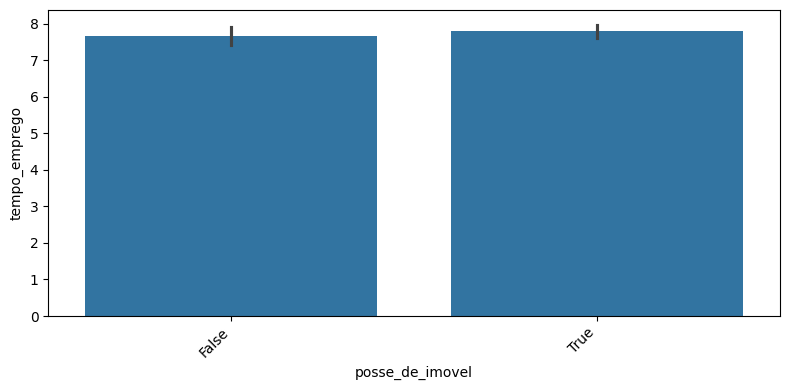

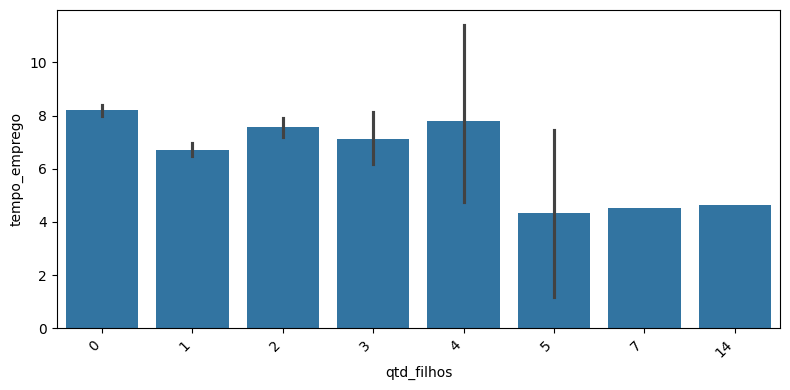

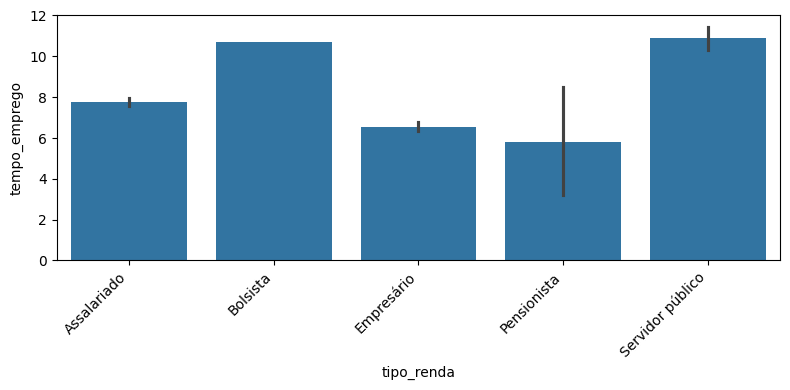

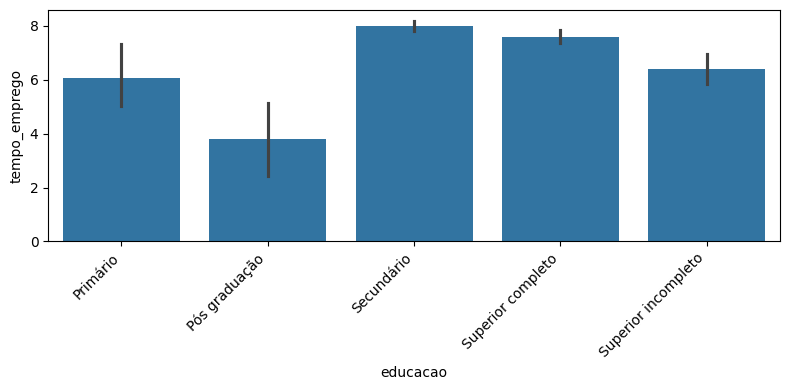

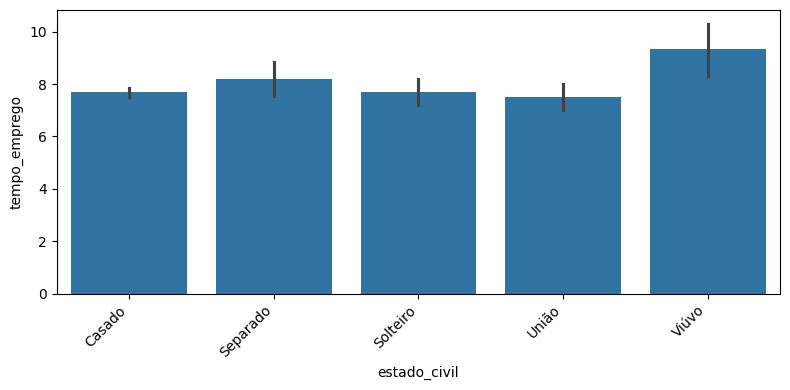

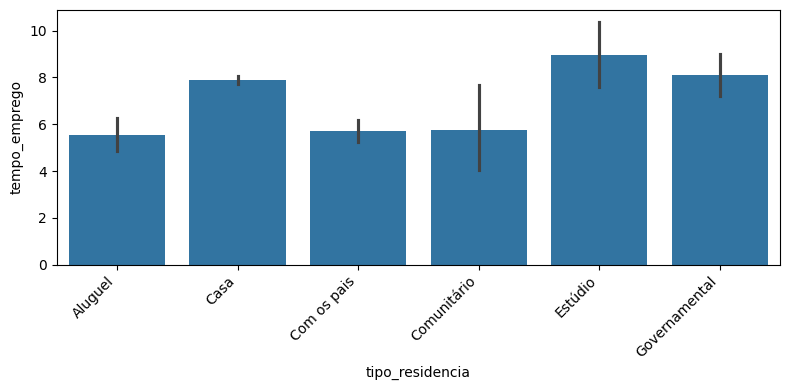

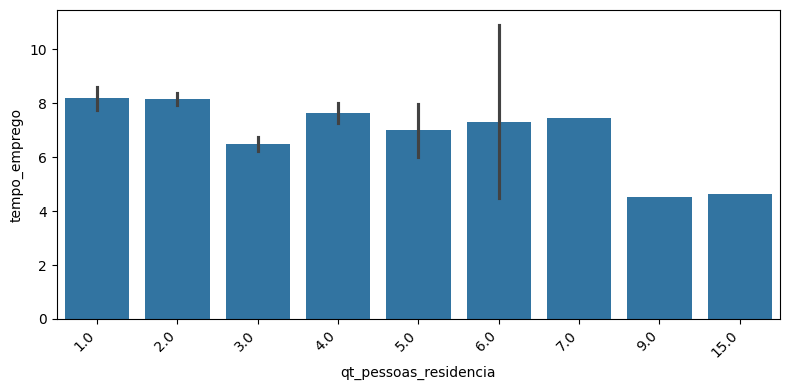

A coluna de interesse abordada agora é: renda


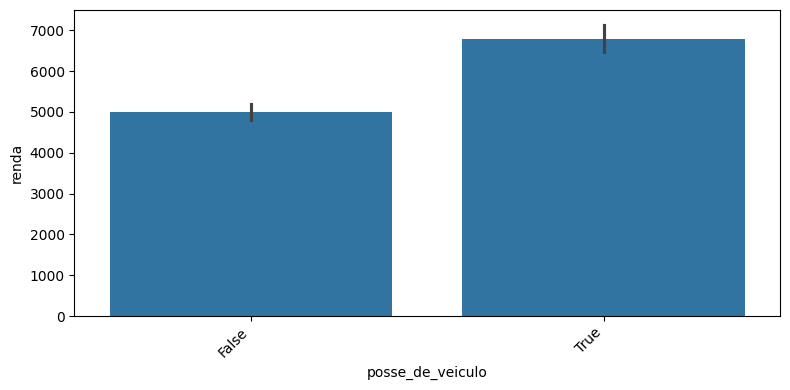

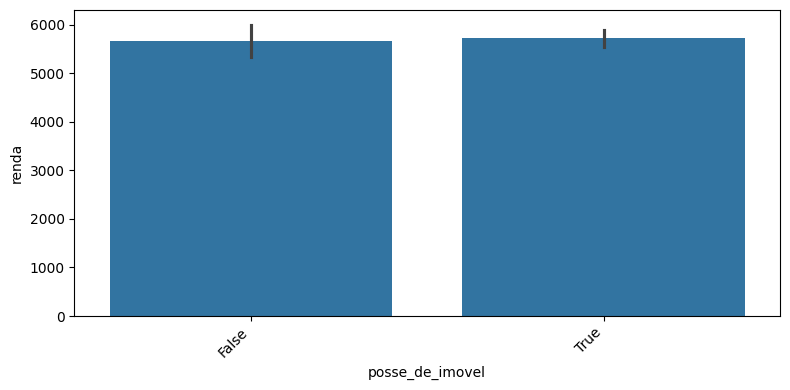

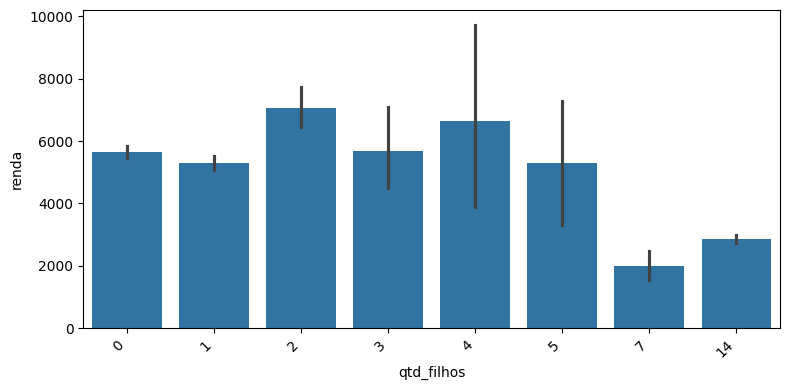

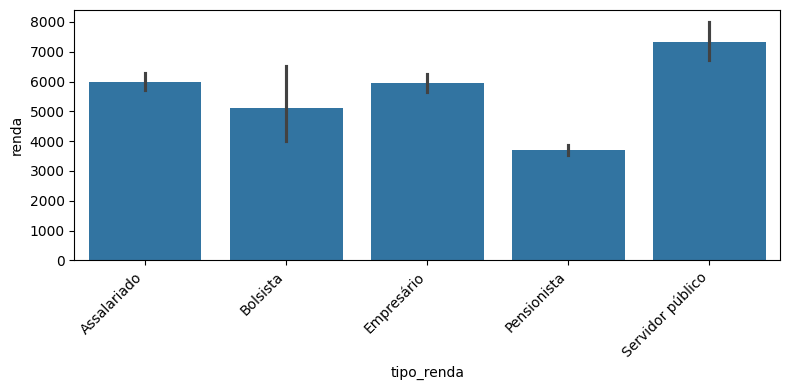

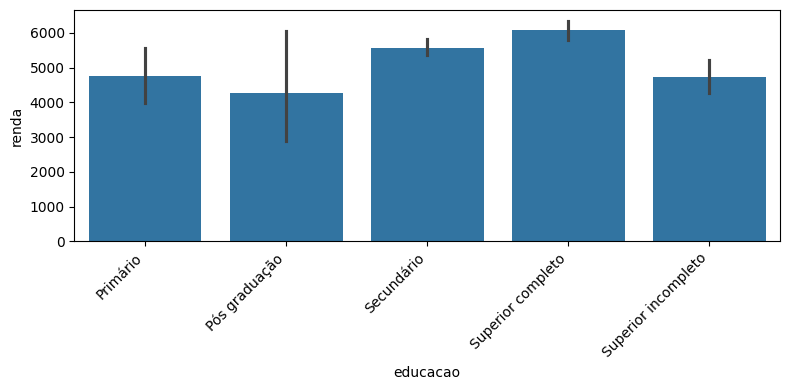

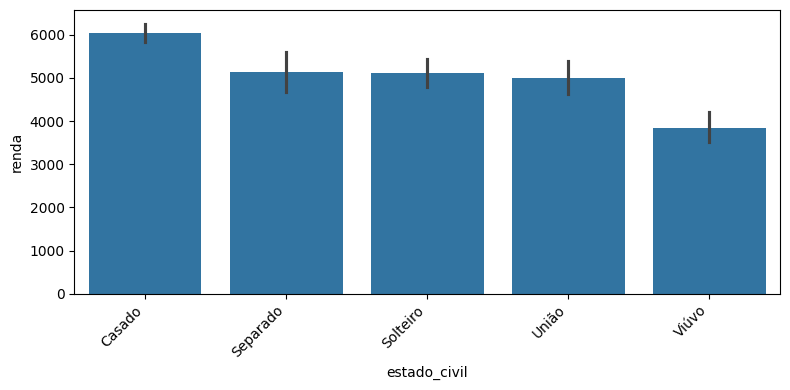

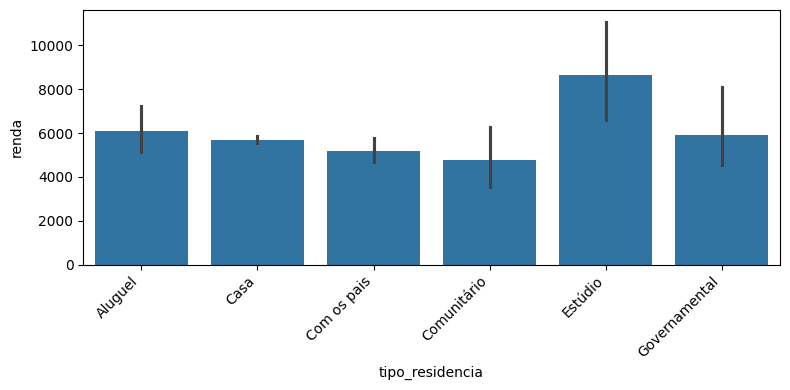

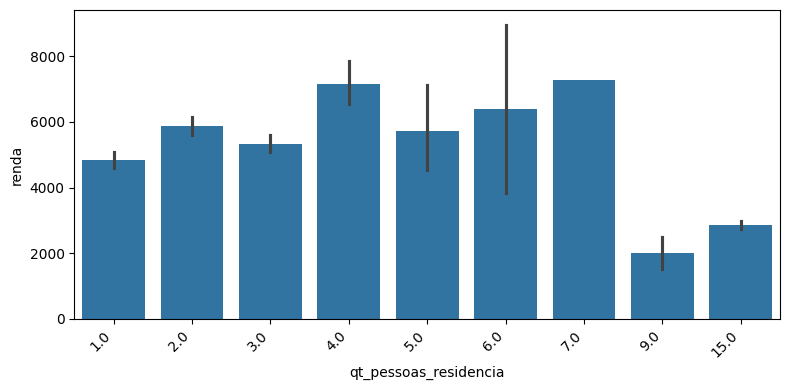

In [298]:
lista_variaveis_continuas = ['idade', 'tempo_emprego', 'renda']
lista_variaveis_categoricas = df_vizualizacao.select_dtypes(['category']).columns.to_list()

for col_interesse in lista_variaveis_continuas:
    print(f'A coluna de interesse abordada agora é: {col_interesse}')
    for col_categorica in lista_variaveis_categoricas:
        fig, ax = plt.subplots(figsize=(8,4))
        sns.barplot(x=df_vizualizacao[col_categorica], y= df_vizualizacao[col_interesse])
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



#### Feature Engineering

In [299]:
df_completo

,data_ref,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,2016-03-01,14105,False,False,1,Assalariado,Superior completo,Casado,Casa,33,1.041096,3.0,1918.14
14996,2016-03-01,3722,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,2016-03-01,6194,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,2016-03-01,4922,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [300]:
# Variável booleana para dependentes
df_completo['possui_dependentes'] = np.where(df_completo['qtd_filhos'] > 0, 1, 0)

# Variável para identificar jovens (até 25 anos)
df_completo['idade_jovem'] = np.where(df_completo['idade'] <= 25, 1, 0)

# Índice de instabilidade de carreira
df_completo['idade_x_tempo_emprego'] = df_completo['idade'] / (df_completo['tempo_emprego'] + 1)


C:\Users\hfasa\AppData\Local\Temp\ipykernel_27528\292691783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_completo['possui_dependentes'] = np.where(df_completo['qtd_filhos'] > 0, 1, 0)
C:\Users\hfasa\AppData\Local\Temp\ipykernel_27528\292691783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_completo['idade_jovem'] = np.where(df_completo['idade'] <= 25, 1, 0)
C:\Users\hfasa\AppData\Local\Temp\ipykernel_27528\292691783.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [301]:
df_completo = df_completo[
    [
        "data_ref",
        "id_cliente",
        "posse_de_veiculo",
        "posse_de_imovel",
        "qtd_filhos",
        "tipo_renda",
        "educacao",
        "estado_civil",
        "tipo_residencia",
        "idade",
        "tempo_emprego",
        "qt_pessoas_residencia",
        "possui_dependentes",
        "idade_jovem",
        "idade_x_tempo_emprego",
        "renda",
    ]
]

df_completo[['posse_de_veiculo','posse_de_imovel']] = df_completo.select_dtypes(['bool']).astype('int')
df_completo

,data_ref,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,possui_dependentes,idade_jovem,idade_x_tempo_emprego,renda
0,2015-01-01,15056,0,1,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,0,0,3.419820,8060.34
1,2015-01-01,9968,1,1,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,0,0,3.421493,1852.15
2,2015-01-01,4312,1,1,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,0,0,19.038748,2253.89
3,2015-01-01,10639,0,1,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,1,0,5.131209,6600.77
4,2015-01-01,7064,1,0,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,0,0,6.234472,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,2016-03-01,14105,0,0,1,Assalariado,Superior completo,Casado,Casa,33,1.041096,3.0,1,0,16.167785,1918.14
14996,2016-03-01,3722,0,1,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,0,0,NaN,10093.45
14997,2016-03-01,6194,1,1,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,0,0,5.094603,604.82
14998,2016-03-01,4922,1,0,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,0,0,6.794209,3352.27


#### Tratamento de NaN's

In [302]:
mask = (df_completo['tempo_emprego'].isna()) & (df_completo['tipo_renda'] == 'Pensionista')

df_completo.loc[mask, 'tempo_emprego'] = -1
df_completo.loc[mask, 'idade_x_tempo_emprego'] = -1

In [303]:
df_completo

,data_ref,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,possui_dependentes,idade_jovem,idade_x_tempo_emprego,renda
0,2015-01-01,15056,0,1,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,0,0,3.419820,8060.34
1,2015-01-01,9968,1,1,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,0,0,3.421493,1852.15
2,2015-01-01,4312,1,1,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,0,0,19.038748,2253.89
3,2015-01-01,10639,0,1,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,1,0,5.131209,6600.77
4,2015-01-01,7064,1,0,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,0,0,6.234472,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,2016-03-01,14105,0,0,1,Assalariado,Superior completo,Casado,Casa,33,1.041096,3.0,1,0,16.167785,1918.14
14996,2016-03-01,3722,0,1,0,Pensionista,Superior completo,Solteiro,Casa,57,-1.000000,1.0,0,0,-1.000000,10093.45
14997,2016-03-01,6194,1,1,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,0,0,5.094603,604.82
14998,2016-03-01,4922,1,0,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,0,0,6.794209,3352.27


Os modelos estavam saindo com a acurácia muito baixa, em alguns casos até negativa, uma das soluções que pensei seria de agrupar a variável `tempo_emprego` para mitigar o efeito dos valores negativos, mas irei tomar uma abordagem de esxcluir as linhas NaN's

In [304]:
df_completo = df_completo[~mask]

#### Tratamento de outliers

In [305]:
# ------------------------------------------------#
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierTreatment(BaseEstimator, TransformerMixin):
    def __init__(self, contamination=0.1, random_state=42):
        self.contamination = contamination
        self.random_state = random_state
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        _df = X.copy()
        _df_scaled = StandardScaler().fit_transform(_df)
        iso = IsolationForest(contamination=self.contamination, random_state=self.random_state)
        pred = iso.fit_predict(_df_scaled)
        _df['outlier_iforest'] = (pred == -1)
        return _df


# ------------------------------------------------#

In [306]:
df_completo

,data_ref,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,possui_dependentes,idade_jovem,idade_x_tempo_emprego,renda
0,2015-01-01,15056,0,1,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,0,0,3.419820,8060.34
1,2015-01-01,9968,1,1,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,0,0,3.421493,1852.15
2,2015-01-01,4312,1,1,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,0,0,19.038748,2253.89
3,2015-01-01,10639,0,1,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,1,0,5.131209,6600.77
4,2015-01-01,7064,1,0,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,0,0,6.234472,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14981,2016-03-01,8008,1,0,2,Assalariado,Secundário,Casado,Casa,41,19.679452,4.0,1,0,1.982644,3971.13
14992,2016-03-01,14105,0,0,1,Assalariado,Superior completo,Casado,Casa,33,1.041096,3.0,1,0,16.167785,1918.14
14997,2016-03-01,6194,1,1,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,0,0,5.094603,604.82
14998,2016-03-01,4922,1,0,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,0,0,6.794209,3352.27


In [307]:
flag_outlier = OutlierTreatment()
diagnostico_outlier = flag_outlier.transform(pd.get_dummies(df_completo.drop(columns=['data_ref']), drop_first=True))
diagnostico_outlier['outlier_iforest']

0        False
1        False
2        False
3        False
4         True
         ...  
14981    False
14992    False
14997    False
14998    False
14999    False
Name: outlier_iforest, Length: 8161, dtype: bool

In [308]:
df_completo['data_ref'] = pd.to_datetime(df_completo['data_ref'])

C:\Users\hfasa\AppData\Local\Temp\ipykernel_27528\4127889538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_completo['data_ref'] = pd.to_datetime(df_completo['data_ref'])


In [309]:
df_completo['outlier_iforest'] = diagnostico_outlier['outlier_iforest']
df_completo_sem_outliers = df_completo.loc[df_completo['outlier_iforest'] == 0]

C:\Users\hfasa\AppData\Local\Temp\ipykernel_27528\4075688850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_completo['outlier_iforest'] = diagnostico_outlier['outlier_iforest']


#### Feature Selection

In [310]:
df_completo_sem_outliers.drop(columns=['id_cliente'], inplace=True)

C:\Users\hfasa\AppData\Local\Temp\ipykernel_27528\2265545925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_completo_sem_outliers.drop(columns=['id_cliente'], inplace=True)


In [311]:
df_completo_sem_outliers['Ano'] = df_completo['data_ref'].dt.year

C:\Users\hfasa\AppData\Local\Temp\ipykernel_27528\3328226931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_completo_sem_outliers['Ano'] = df_completo['data_ref'].dt.year


In [312]:
df_treino = df_completo_sem_outliers.loc[df_completo_sem_outliers['Ano'] == 2015]
X_treino = df_treino.drop(columns=['renda', 'data_ref'])
y_treino = df_treino['renda']
df_teste_oot = df_completo_sem_outliers.loc[df_completo_sem_outliers['Ano'] == 2016]
X_teste = df_teste_oot.drop(columns=['renda', 'data_ref'])
y_teste = df_teste_oot['renda']

In [313]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            print(included+[new_column])
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()  # retorna o nome da coluna
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()  # retorna o nome da coluna
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [314]:
result = stepwise_selection(X_treino.select_dtypes(include=['int64', 'float64']), y_treino)
print('resulting features:')
print(result)

['tempo_emprego']
['idade_x_tempo_emprego']
['qtd_filhos']
['qt_pessoas_residencia']
['idade']
Add  tempo_emprego                  with p-value 1.17773e-176
['tempo_emprego']
['tempo_emprego', 'qtd_filhos']
['tempo_emprego', 'qt_pessoas_residencia']
['tempo_emprego', 'idade']
['tempo_emprego', 'idade_x_tempo_emprego']
Add  qt_pessoas_residencia          with p-value 0.000645768
['tempo_emprego', 'qt_pessoas_residencia']
['tempo_emprego', 'qt_pessoas_residencia', 'qtd_filhos']
['tempo_emprego', 'qt_pessoas_residencia', 'idade']
['tempo_emprego', 'qt_pessoas_residencia', 'idade_x_tempo_emprego']
Add  qtd_filhos                     with p-value 0.000172049
['tempo_emprego', 'qt_pessoas_residencia', 'qtd_filhos']
['tempo_emprego', 'qt_pessoas_residencia', 'qtd_filhos', 'idade']
['tempo_emprego', 'qt_pessoas_residencia', 'qtd_filhos', 'idade_x_tempo_emprego']
['tempo_emprego', 'qt_pessoas_residencia', 'qtd_filhos']
resulting features:
['tempo_emprego', 'qt_pessoas_residencia', 'qtd_filhos']

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


In [315]:
X_treino.columns

Index(['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda',
       'educacao', 'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'possui_dependentes', 'idade_jovem',
       'idade_x_tempo_emprego', 'outlier_iforest', 'Ano'],
      dtype='object')

In [316]:
formula = "+".join(X_treino[['tempo_emprego', 'idade', 'qt_pessoas_residencia', 'qtd_filhos','posse_de_veiculo','posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'possui_dependentes']].columns.to_list())

modelo_reg = smf.ols(f'renda ~ {formula}', data=df_treino).fit()

In [317]:
modelo_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     53.43
Date:                Sun, 17 Aug 2025   Prob (F-statistic):          7.44e-188
Time:                        15:44:31   Log-Likelihood:                -65832.
No. Observations:                6374   AIC:                         1.317e+05
Df Residuals:                    6354   BIC:                         1.318e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        -401.2072   3027.333     -0.133      0.895   -6335.801    5533.386
tipo_renda[T.Bolsista]          -2939.2141   3324.786     -0.884      0.377   -9456.916    3578.488
tipo_renda[T.Empresário]          363.6282    216.813      1.677      0.094     -61.398     788.655
tipo_renda[T.Pensionista]       -1868.1778   3322.940     -0.562      0.574   -8382.262    4645.907
tipo_renda[T.Servidor público]   -561.3934    339.931     -1.651      0.099   -1227.773     104.986
educacao[T.Pós graduação]        -724.8964   2240.249     -0.324      0.746   -5116.541    3666.748
educacao[T.Secundário]           -362.5722   1037.391     -0.350      0.727   -2396.209    1671.064
educacao[T.Superior completo]    -153.6971   1043.194     -0.147      0.883   -2198.710    1891.316
educacao[T.Superior incompleto] -1052.7256   1162.525     -0.906      0.365   -3331.667    1226.215
estado_civil[T.Separado]          123.8774   1460.735      0.085      0.932   -2739.656    2987.411
estado_civil[T.Solteiro]          270.5645   1424.340      0.190      0.849   -2521.623    3062.752
estado_civil[T.União]            -730.7976    370.554     -1.972      0.049   -1457.208      -4.387
estado_civil[T.Viúvo]           -1022.2592   1541.277     -0.663      0.507   -4043.681    1999.163
tempo_emprego                     451.9471     15.639     28.899      0.000     421.289     482.605
idade                               7.4731     11.626      0.643      0.520     -15.318      30.264
qt_pessoas_residencia            1014.6377   1403.780      0.723      0.470   -1737.244    3766.520
qtd_filhos                       -683.2519   1426.403     -0.479      0.632   -3479.483    2112.979
posse_de_veiculo                 1796.0833    193.439      9.285      0.000    1416.878    2175.288
posse_de_imovel                   347.4917    201.751      1.722      0.085     -48.008     742.991
possui_dependentes               -523.8162    420.682     -1.245      0.213   -1348.496     300.863
==============================================================================
Omnibus:                     8708.983   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3440184.463
Skew:                           7.679   Prob(JB):                         0.00
Kurtosis:                     115.772   Cond. No.                     1.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [318]:
# Cálculo de R-Quadrado
tss_test = ((y_teste - y_teste.mean()) ** 2).sum()
rss_test = ((y_teste - modelo_reg.predict(X_teste)) ** 2).sum()
r_quadrado_test = 1 - rss_test / tss_test

# Cálculo de R-Quadrado Ajustado
qtd_variaveis_explicativas = len(modelo_reg.params) - 1
r_quadrado_ajustado_teste = 1 - (1 - r_quadrado_test) * (len(y_teste) - 1) / (
    len(y_teste) - qtd_variaveis_explicativas - 1
)

print(f'R-quadrado: {r_quadrado_test:.2%}')
print(f'R-quadrado Ajustado: {r_quadrado_ajustado_teste:.2%}')

R-quadrado: 13.40%
R-quadrado Ajustado: 11.67%


In [319]:
formula

'tempo_emprego+idade+qt_pessoas_residencia+qtd_filhos+posse_de_veiculo+posse_de_imovel+tipo_renda+educacao+estado_civil+possui_dependentes'

In [320]:
# Fórmulas para diferentes modelos de regressão
formula_categoricas = "qtd_filhos+posse_de_veiculo+posse_de_imovel+tipo_renda+educacao+estado_civil+possui_dependentes"
formula_numericas = "renda ~ tempo_emprego+idade"
formula_numericas_power = (
    "I(np.power(renda, 2)) ~ I(np.power(tempo_emprego,2))+I(np.power(idade, 2))"
)
formula_numericas_log = (
    "I(np.log(renda + 2)) ~ I(np.log(tempo_emprego + 2))+I(np.log(idade + 2 ))"
)

# Dicionário que organiza as fórmulas dos modelos
dict_model_order = {
    "Ridge_comum": formula_numericas + "+" + formula_categoricas,
    "Ridge_power": formula_numericas_power + "+" + formula_categoricas,
    "Ridge_log": formula_numericas_log + "+" + formula_categoricas,
}
        
# Loop para treinar cada modelo conforme a fórmula definida
for processo, formula in dict_model_order.items():
    if processo == "Ridge_comum":
        modelo_ridge = smf.ols(
            formula, data=df_treino
        ).fit_regularized(method='elastic_net', refit=True, L1_wt=0, alpha=0.001)

    if processo == "Ridge_power":
        modelo_ridge_power = smf.ols(
            formula, data=df_treino
        ).fit_regularized(method='elastic_net', refit=True, L1_wt=0, alpha=0.001)

    if processo == "Ridge_log":
        modelo_ridge_log = smf.ols(
            formula, data=df_treino
        ).fit_regularized(method='elastic_net', refit=True, L1_wt=0, alpha=0.001)


In [321]:
def avaliacao_performance_regressao(reg, X_test, y_test, y_train):
    y_pred_test = reg.predict(X_test)
    
    residuos_test = y_test - y_pred_test


    r_quadrado = r2_score(y_test, y_pred_test)
    r_quadrado_ajustado = 1 - ((1 - r_quadrado) * (len(y_test) - 1)) / (len(y_test) - len(X_test.columns) - 1)
    
    rss = np.power(y_test - y_pred_test, 2).sum()
    log_vero_test = (
    -len(y_train) / 2 * (np.log(2 * np.pi) + np.log(rss/len(y_test)) + 1)
    )
    
    
    aic = 2* len(reg.params) - 2 * log_vero_test
    
    return r_quadrado, r_quadrado_ajustado, aic, reg.params
    

In [322]:
df_treino.select_dtypes(['float64', 'int64']).corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,idade_x_tempo_emprego,renda
qtd_filhos,1.000000,-0.312025,-0.070898,0.898974,-0.043629,-0.007764
idade,-0.312025,1.000000,0.293090,-0.287745,0.115222,0.095887
tempo_emprego,-0.070898,0.293090,1.000000,-0.063480,-0.645309,0.344118
qt_pessoas_residencia,0.898974,-0.287745,-0.063480,1.000000,-0.045870,0.018190
idade_x_tempo_emprego,-0.043629,0.115222,-0.645309,-0.045870,1.000000,-0.208185
renda,-0.007764,0.095887,0.344118,0.018190,-0.208185,1.000000


In [323]:
dicionario_indicadores = {}

r_quadrado_func, r_quadrado_ajustado_func, aic_func, coeficientes_func = avaliacao_performance_regressao(modelo_ridge, X_teste, y_teste, y_treino)
dicionario_indicadores['Modelo Ridge Comum'] = {'R-Quadrado': round(r_quadrado_func, 3), 'R-Quadrado Ajustado': round(r_quadrado_ajustado_func, 3), 'AIC': aic_func, 'Coef': coeficientes_func}
r_quadrado_func, r_quadrado_ajustado_func, aic_func, coeficientes_func = avaliacao_performance_regressao(modelo_ridge_power, X_teste, y_teste, y_treino)
dicionario_indicadores['Modelo Ridge Polinômio'] = {'R-Quadrado': round(r_quadrado_func, 3), 'R-Quadrado Ajustado': round(r_quadrado_ajustado_func, 3), 'AIC': aic_func, 'Coef': coeficientes_func}
r_quadrado_func, r_quadrado_ajustado_func, aic_func, coeficientes_func = avaliacao_performance_regressao(modelo_ridge_log, X_teste, y_teste, y_treino)
dicionario_indicadores['Modelo Ridge Logaritimico'] = {'R-Quadrado': round(r_quadrado_func, 3), 'R-Quadrado Ajustado': round(r_quadrado_ajustado_func, 3), 'AIC': aic_func, 'Coef': coeficientes_func}

pd.DataFrame(dicionario_indicadores)

,Modelo Ridge Comum,Modelo Ridge Polinômio,Modelo Ridge Logaritimico
R-Quadrado,0.135,-730457569.398,-0.638
R-Quadrado Ajustado,0.121,-741930724.954,-0.664
AIC,129801.426181,260811.681954,133868.267195
Coef,"[1307.648060678575, -1285.7180577313459, 362.7...","[-8448237.725301575, -43977646.954879455, -315...","[4.494492692247394, -0.10746615949714859, 0.09..."


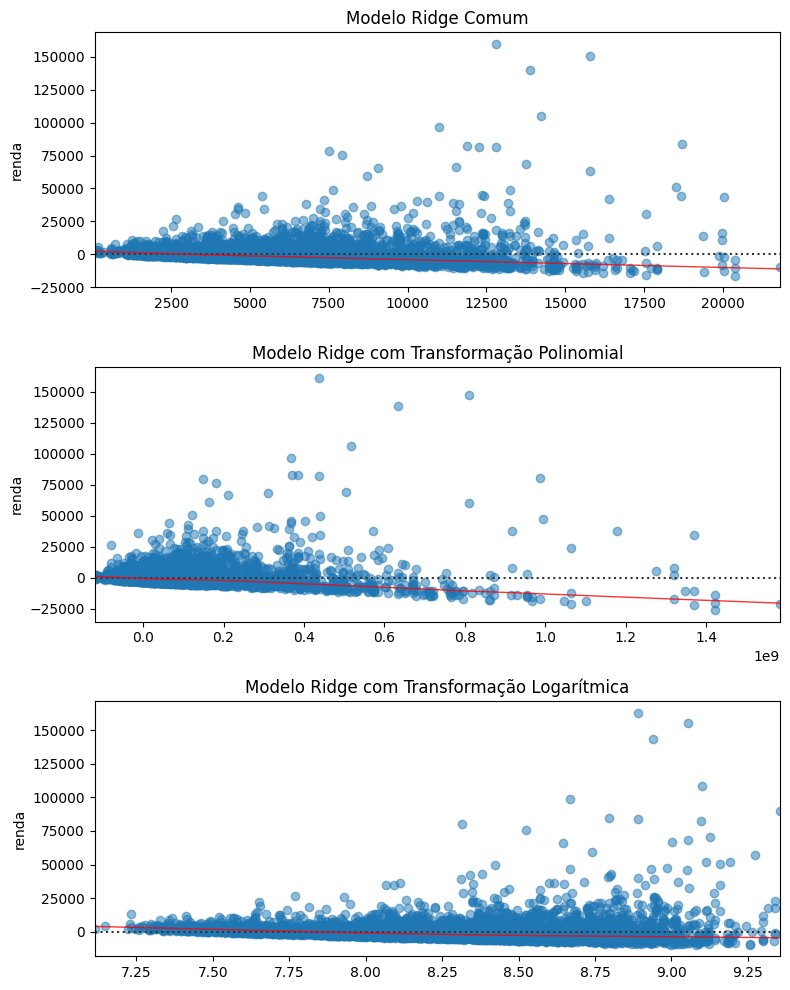

In [324]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))
ax = ax.flatten()

# Modelo Ridge comum
sns.residplot(
    x=modelo_ridge.predict(), 
    y=df_treino["renda"], 
    lowess=True,
    scatter_kws={'alpha': 0.5}, ax=ax[0],
    line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}
)
ax[0].set_title("Modelo Ridge Comum")

# Modelo Ridge polinomial
sns.residplot(
    x=modelo_ridge_power.predict(), 
    y=df_treino["renda"], 
    lowess=True,
    scatter_kws={'alpha': 0.5}, ax=ax[1],
    line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}
)
ax[1].set_title("Modelo Ridge com Transformação Polinomial")

# Modelo Ridge logarítmico
sns.residplot(
    x=modelo_ridge_log.predict(), 
    y=df_treino["renda"], 
    lowess=True,
    scatter_kws={'alpha': 0.5}, ax=ax[2],
    line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}
)
ax[2].set_title("Modelo Ridge com Transformação Logarítmica")

plt.tight_layout()
plt.show()


In [325]:
# Criar dummies no treino
X_treino_dummies = pd.get_dummies(X_treino, drop_first=True).astype(int)

# Criar dummies no teste e alinhar com o treino
X_teste_dummies = pd.get_dummies(X_teste, drop_first=True).astype(int)
X_teste_dummies = X_teste_dummies.reindex(columns=X_treino_dummies.columns, fill_value=0)

# Treinar o modelo
modelo_tree_reg = DecisionTreeRegressor(random_state=42)
modelo_tree_reg.fit(X_treino_dummies, y_treino)


DecisionTreeRegressor(random_state=42)

In [326]:
modelo_tree_reg.score(X_treino_dummies, y_treino)

0.748275772831487

In [327]:
predicao_modelo_arvore = modelo_tree_reg.score(X_teste_dummies, y_teste)
predicao_modelo_arvore

-0.38186091264533983

n_minimo,2,3,4,5,6,7,8,9
profundidade,,,,,,,,
2,0.090972,0.090972,0.090972,0.090972,0.090972,0.090972,0.090972,0.090972
3,0.158025,0.158025,0.158025,0.158025,0.158025,0.158025,0.158025,0.158025
4,0.172860,0.172589,0.176466,0.176409,0.176444,0.176444,0.176444,0.176444
5,0.137769,0.137549,0.151783,0.151726,0.151761,0.151761,0.152501,0.152610
6,0.088613,0.090802,0.105253,0.105048,0.120970,0.121811,0.198582,0.199397
7,0.090489,0.081592,0.087792,0.104235,0.104882,0.144638,0.212381,0.212484
8,0.052004,0.035263,0.049530,0.051712,0.084941,0.086824,0.151218,0.167184


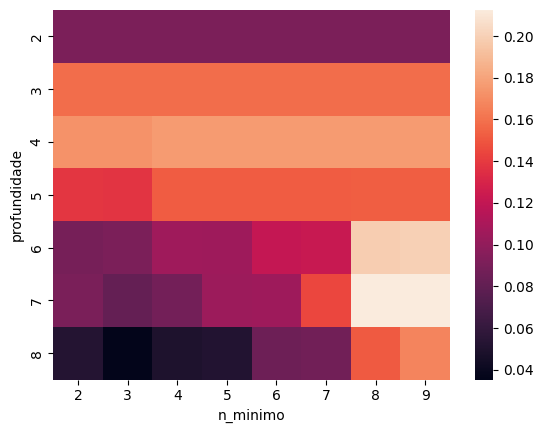

In [328]:
mses = []
ind_i = []
ind_j = []

for i in range(2, 9):
    for j in range(2, 10):
        regr_1 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_1.fit(X_treino_dummies, y_treino)
        mse1 = regr_1.score(X_teste_dummies, y_teste)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)
        
df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo':ind_j})
sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

In [329]:
# Importação dos módulos necessários para busca de hiperparâmetros e árvore de decisão
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# 1. Extração dos valores possíveis para o parâmetro de poda ccp_alpha
# O método cost_complexity_pruning_path retorna os valores de ccp_alpha que podem ser usados para podar a árvore.
path = DecisionTreeRegressor(random_state=42).cost_complexity_pruning_path(X_treino_dummies, y_treino)
ccp_alphas = path.ccp_alphas

# Para evitar que o grid fique muito pesado, limitamos os valores de ccp_alpha para valores não-negativos
ccp_alphas = [a for a in ccp_alphas if a >= 0][:30]

# 2. Definição da grade de hiperparâmetros para busca
# max_depth: profundidade máxima da árvore (quanto maior, mais complexa)
# min_samples_leaf: número mínimo de amostras em uma folha (evita folhas com poucos dados)
# ccp_alpha: parâmetro de custo-complexidade para poda (quanto maior, mais agressiva a poda)
params = {
    "max_depth": [3, 4, 5, 6],
    "min_samples_leaf": [2, 3, 4, 5],
    "ccp_alpha": ccp_alphas
}

# 3. Execução do GridSearchCV
# GridSearchCV realiza busca exaustiva combinando todos os valores possíveis dos hiperparâmetros definidos.
# cv=5: utiliza validação cruzada com 5 folds para avaliar cada combinação.
# scoring="r2": métrica utilizada é o R² (coeficiente de determinação).
# n_jobs=-1: utiliza todos os núcleos disponíveis para acelerar o processo.
grid = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=params,
    cv=5,              # 5-fold cross-validation
    scoring="r2",
    n_jobs=-1
)

# Ajuste do modelo com os dados de treino
grid.fit(X_treino_dummies, y_treino)

# 4. Exibição dos melhores resultados encontrados
print("Melhor R² médio (cross-val):", grid.best_score_)
print("Melhores hiperparâmetros:", grid.best_params_)

# 5. Avaliação do melhor modelo encontrado nos dados de treino e teste
best_tree = grid.best_estimator_
print("R² no treino:", best_tree.score(X_treino_dummies, y_treino))
print("R² no teste :", best_tree.score(X_teste_dummies, y_teste))


Melhor R² médio (cross-val): 0.11115314758551682
Melhores hiperparâmetros: {'ccp_alpha': 0.0, 'max_depth': 3, 'min_samples_leaf': 3}
R² no treino: 0.16354733572830982
R² no teste : 0.15802527102203123


## Etapa 5 Crisp-DM: Avaliação dos resultados


Após análise dos 4 modelos construidos, 3 deles sendo variações da linha de regressão, foi concluido que o modelo de maior eficácia e maior retorno financeiro para empresa por suas leituras e estimativas mais precisas, seria a árvore de regressão que apresentou um R-Quadrado no teste de 0.15

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.